# Testing apply vs pandas' methods

In [20]:
import pandas as pd
import datetime as dt
from collections import defaultdict
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

## `apply` vs `to_datetime`

Let's define a couple of helper functions: `str_to_datetime` which is the function we'll be applying, and `generate_dates` which simply returns some dates for us to play around.

In [8]:
def str_to_datetime(date_str, fmt):
    return dt.datetime.strptime(date_str, fmt)

def generate_dates(n):
    current = dt.datetime.today()
    while n >= 0:
        yield (current - dt.timedelta(days=n)).strftime('%Y-%m-%d')
        n -= 1

This loop will time the conversion of a `str` to `datetime` using `apply` and `to_datetime` for a `DataFrame` of increasing size (we will only keep the best result).

In [25]:
results = defaultdict(list)

for i in range(100):
    df = pd.DataFrame({"Date": [d for d in generate_dates(i)]})
    
    result = %timeit -r 3 -q -o df["Date"].apply(str_to_datetime, fmt="%Y-%m-%d")
    results['apply'].append(result.best)
    
    result = %timeit -r 3 -q -o pd.to_datetime(df["Date"], format="%Y-%m-%d")
    results['to_datetime'].append(result.best)
    
    results['size'].append(i) 

As we see in the plot below, `apply` seems to take linear time, where as `to_datetime` is closer to constant time.

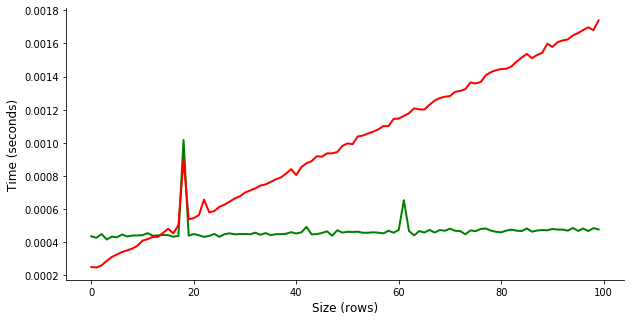

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(
    results['size'],
    results['to_datetime'],
    color='green',
    linewidth=2,
    label='to_datetime'
)
ax.plot(
    results['size'],
    results['apply'],
    color='red',
    linewidth=2,
    label='apply'
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.ylabel('Time (seconds)', fontsize=12)
plt.xlabel('Size (rows)', fontsize=12)

plt.show()

## `apply` vs `add`

Let's try some basic math now: adding a constant value to an increasing number of rows.

In [37]:
def sum_ten(n):
    return n + 10

This plot continues with the trend of the previous test, although the variance seems higher.

In [40]:
results = defaultdict(list)

for i in range(100):
    df = pd.DataFrame({"Number": np.random.randint(0, 1000000, size=i)})
    
    result = %timeit -r 3 -q -o df["Number"].apply(sum_ten)
    results['apply'].append(result.best)
    
    result = %timeit -r 3 -q -o df["Number"].add(10, axis=0)
    results['sum'].append(result.best)
    
    results['size'].append(i) 

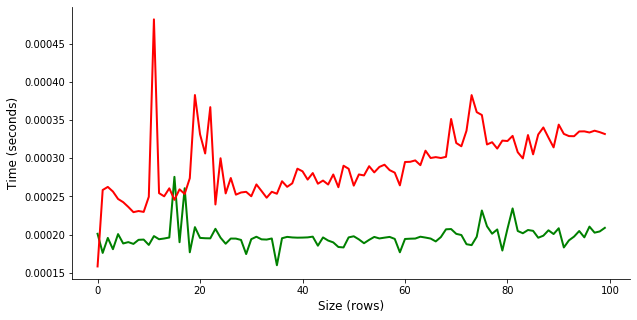

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(
    results['size'],
    results['sum'],
    color='green',
    linewidth=2,
    label='sum'
)
ax.plot(
    results['size'],
    results['apply'],
    color='red',
    linewidth=2,
    label='apply'
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.ylabel('Time (seconds)', fontsize=12)
plt.xlabel('Size (rows)', fontsize=12)

plt.show()

Let's try the same but using `np.add()`.

In [48]:
from functools import partial
partial_add = partial(np.add, 10)
results = defaultdict(list)

for i in range(100):
    df = pd.DataFrame({"Number": np.random.randint(0, 1000000, size=i)})
    
    result = %timeit -r 3 -q -o df["Number"].apply(partial_add)
    results['apply'].append(result.best)
    
    result = %timeit -r 3 -q -o df["Number"].add(10, axis=0)
    results['sum'].append(result.best)
    
    results['size'].append(i) 

Results don't appear to be much different.

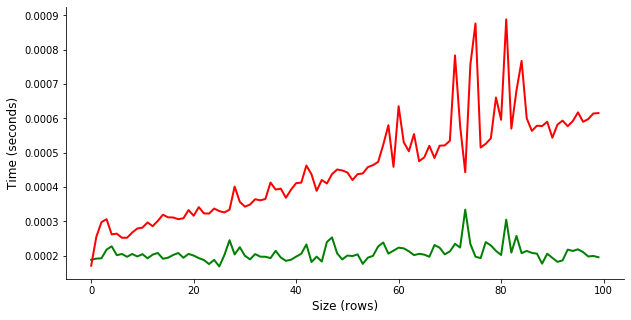

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(
    results['size'],
    results['sum'],
    color='green',
    linewidth=2,
    label='sum'
)
ax.plot(
    results['size'],
    results['apply'],
    color='red',
    linewidth=2,
    label='apply'
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.ylabel('Time (seconds)', fontsize=12)
plt.xlabel('Size (rows)', fontsize=12)

plt.show()

## `apply` vs `str.replace`

We will now try some string replacement operations

In [50]:
def replace_a_for_b(s):
    return s.replace('a', 'b')

In [54]:
results = defaultdict(list)

for i in range(1, 101):
    df = pd.DataFrame({"Letters": ['aabbcc'] * i})
    
    result = %timeit -r 3 -q -o df["Letters"].apply(replace_a_for_b)
    results['apply'].append(result.best)
    
    result = %timeit -r 3 -q -o df["Letters"].str.replace('a', 'b')
    results['str.replace'].append(result.best)
    
    results['size'].append(i) 

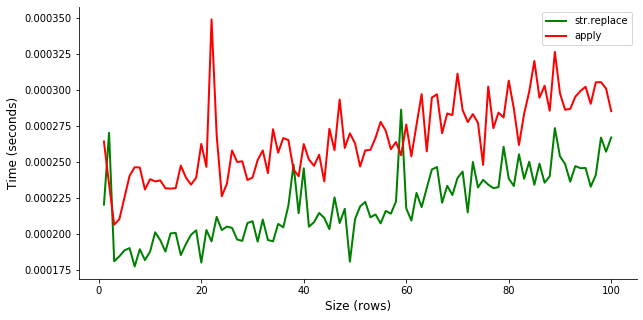

In [56]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(
    results['size'],
    results['str.replace'],
    color='green',
    linewidth=2,
    label='str.replace'
)
ax.plot(
    results['size'],
    results['apply'],
    color='red',
    linewidth=2,
    label='apply'
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.ylabel('Time (seconds)', fontsize=12)
plt.xlabel('Size (rows)', fontsize=12)
plt.legend(loc='upper right')

plt.show()

# Conclusion

If there's a pandas alternative, use it!